In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 1. 법정동 코드 가공

In [3]:
#
locCode=pd.read_excel('../data/법정동코드.xlsx')
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [4]:
#읍면동이 NaN인 데이터 추출 > 읍면동 제외
locCode=locCode.dropna(subset=['읍면동명'])
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN
6,1111010500,서울특별시,종로구,창성동,NaN,19880423,NaN


In [5]:
# 시군구가 NaN이 아닌 데이터 추출 > 시도명 제외
locCode=locCode.dropna(subset=['시군구명'])
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN
6,1111010500,서울특별시,종로구,창성동,NaN,19880423,NaN


In [6]:
# 법정동 코드 컬럼에서 5자리 추출합니다.
# 예) 서울특별시 종로구 > 11000
locCode['법정동코드']=locCode['법정동코드'].astype(str)
locCode['지역코드']=locCode['법정동코드'].str.slice(start=0, stop=5)
locCode.head()


,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN,11110
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN,11110
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN,11110
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN,11110
6,1111010500,서울특별시,종로구,창성동,NaN,19880423,NaN,11110


In [7]:
# 시도명이 서울특별시인 데이터만 추출 후 시도명, 시군구명, 지역코드 컬럼만 추출 
loc1 = locCode[locCode['시도명']=="서울특별시"]
loc1

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN,11110
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN,11110
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN,11110
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN,11110
6,1111010500,서울특별시,종로구,창성동,NaN,19880423,NaN,11110
...,...,...,...,...,...,...,...,...
488,1174010600,서울특별시,강동구,둔촌동,NaN,19880423,NaN,11740
489,1174010700,서울특별시,강동구,암사동,NaN,19880423,NaN,11740
490,1174010800,서울특별시,강동구,성내동,NaN,19880423,NaN,11740
491,1174010900,서울특별시,강동구,천호동,NaN,19880423,NaN,11740


In [8]:
locCode

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN,11110
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN,11110
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN,11110
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN,11110
6,1111010500,서울특별시,종로구,창성동,NaN,19880423,NaN,11110
...,...,...,...,...,...,...,...,...
20551,5013032022,제주특별자치도,서귀포시,표선면,하천리,20060701,NaN,50130
20552,5013032023,제주특별자치도,서귀포시,표선면,성읍리,20060701,NaN,50130
20553,5013032024,제주특별자치도,서귀포시,표선면,가시리,20060701,NaN,50130
20554,5013032025,제주특별자치도,서귀포시,표선면,세화리,20060701,NaN,50130


# 2. 실거래가 데이터 가공

In [9]:
# 실거래가 데이터 불러오기
apt = pd.read_csv('../data/2020년 서울 아파트 실거래가.csv', encoding="cp949")
apt.head()

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명
0,장위동,59.92,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티
1,길음동,84.77,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아
2,구로동,36.90,1.0,2001,아파트,105000000,1994.0,궁전아트빌라
3,산천동,59.55,2.0,2001,아파트,830000000,2001.0,리버힐삼성
4,이촌동,64.43,5.0,2001,아파트,735000000,1971.0,강변


In [10]:
# 데이터 프레임의 컬럼을 확인합니다.
apt.columns

Index(['법정동명', '건물면적', '층정보', '건물주용도코드', '건물주용도', '거래금액', '건축년도', '아파트명'], dtype='object')

In [11]:
# 데이터 프레임의 크기(차원)을 조회합니다
apt.shape

(176001, 8)

In [12]:
# 불러온 데이터에 NA값이 있는지 조회합니다.
apt.isnull().sum()

법정동명           0
건물면적           0
층정보        12163
건물주용도코드        0
건물주용도          0
거래금액           0
건축년도         565
아파트명       12163
dtype: int64

In [13]:
# 실거래가 데이터프레임 정보 조회
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176001 entries, 0 to 176000
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   법정동명     176001 non-null  object 
 1   건물면적     176001 non-null  float64
 2   층정보      163838 non-null  float64
 3   건물주용도코드  176001 non-null  int64  
 4   건물주용도    176001 non-null  object 
 5   거래금액     176001 non-null  int64  
 6   건축년도     175436 non-null  float64
 7   아파트명     163838 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 10.7+ MB


In [14]:
# 실거래가 데이터프레임 정보 조회 (거래금액 컬럼 변경 확인)
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176001 entries, 0 to 176000
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   법정동명     176001 non-null  object 
 1   건물면적     176001 non-null  float64
 2   층정보      163838 non-null  float64
 3   건물주용도코드  176001 non-null  int64  
 4   건물주용도    176001 non-null  object 
 5   거래금액     176001 non-null  int64  
 6   건축년도     175436 non-null  float64
 7   아파트명     163838 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 10.7+ MB


In [15]:
# 범주화된 전용면적의 고유값을 확인합니다.


In [16]:
apt['건물면적'].unique()

array([ 59.92,  84.77,  36.9 , ..., 536.52, 292.27, 294.03])

# 3. 데이터 프레임 결합

In [17]:
# 지역 코드를 기준으로 법정동 코드 데이터 프레임과 아파트 실거래가 데이터 프레임을 결합합니다.
df=pd.merge(apt,loc1,left_on=['법정동명'], right_on=['읍면동명'])
df

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
0,장위동,59.92,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티,1129013800,서울특별시,성북구,장위동,NaN,19880423,NaN,11290
1,장위동,116.91,2.0,2001,아파트,1270000000,0.0,래미안장위퍼스트하이,1129013800,서울특별시,성북구,장위동,NaN,19880423,NaN,11290
2,장위동,59.99,17.0,2001,아파트,820000000,0.0,래미안장위퍼스트하이,1129013800,서울특별시,성북구,장위동,NaN,19880423,NaN,11290
3,장위동,62.55,NaN,1001,단독주택,714600000,1970.0,NaN,1129013800,서울특별시,성북구,장위동,NaN,19880423,NaN,11290
4,장위동,84.48,12.0,2001,아파트,1150000000,0.0,꿈의숲 아이파크,1129013800,서울특별시,성북구,장위동,NaN,19880423,NaN,11290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179813,구수동,29.98,5.0,2002,연립주택,295000000,2015.0,동원스위트홈,1144011300,서울특별시,마포구,구수동,NaN,19880423,NaN,11440
179814,구수동,64.20,3.0,2002,연립주택,508000000,2009.0,근상프리즘1동,1144011300,서울특별시,마포구,구수동,NaN,19880423,NaN,11440
179815,구수동,29.95,2.0,2002,연립주택,380000000,2015.0,동원스위트홈,1144011300,서울특별시,마포구,구수동,NaN,19880423,NaN,11440
179816,구수동,41.21,3.0,2002,연립주택,390000000,2015.0,동원스위트홈(16-5),1144011300,서울특별시,마포구,구수동,NaN,19880423,NaN,11440


In [18]:
pd.options.display.float_format = '{:.0f}'.format
df['평']=round(df['건물면적']*0.3025)
df['평당가격']=df['거래금액']/df['평']
df

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드,평,평당가격
0,장위동,60,5,2001,아파트,749000000,0,래미안 장위포레카운티,1129013800,서울특별시,성북구,장위동,NaN,19880423,nan,11290,18,41611111
1,장위동,117,2,2001,아파트,1270000000,0,래미안장위퍼스트하이,1129013800,서울특별시,성북구,장위동,NaN,19880423,nan,11290,35,36285714
2,장위동,60,17,2001,아파트,820000000,0,래미안장위퍼스트하이,1129013800,서울특별시,성북구,장위동,NaN,19880423,nan,11290,18,45555556
3,장위동,63,nan,1001,단독주택,714600000,1970,NaN,1129013800,서울특별시,성북구,장위동,NaN,19880423,nan,11290,19,37610526
4,장위동,84,12,2001,아파트,1150000000,0,꿈의숲 아이파크,1129013800,서울특별시,성북구,장위동,NaN,19880423,nan,11290,26,44230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179813,구수동,30,5,2002,연립주택,295000000,2015,동원스위트홈,1144011300,서울특별시,마포구,구수동,NaN,19880423,nan,11440,9,32777778
179814,구수동,64,3,2002,연립주택,508000000,2009,근상프리즘1동,1144011300,서울특별시,마포구,구수동,NaN,19880423,nan,11440,19,26736842
179815,구수동,30,2,2002,연립주택,380000000,2015,동원스위트홈,1144011300,서울특별시,마포구,구수동,NaN,19880423,nan,11440,9,42222222
179816,구수동,41,3,2002,연립주택,390000000,2015,동원스위트홈(16-5),1144011300,서울특별시,마포구,구수동,NaN,19880423,nan,11440,12,32500000


In [19]:
df1=df[['건물면적','층정보','건물주용도','거래금액','건축년도','아파트명','시군구명','읍면동명','평','평당가격',"지역코드"]]
df1

,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명,시군구명,읍면동명,평,평당가격,지역코드
0,60,5,아파트,749000000,0,래미안 장위포레카운티,성북구,장위동,18,41611111,11290
1,117,2,아파트,1270000000,0,래미안장위퍼스트하이,성북구,장위동,35,36285714,11290
2,60,17,아파트,820000000,0,래미안장위퍼스트하이,성북구,장위동,18,45555556,11290
3,63,nan,단독주택,714600000,1970,NaN,성북구,장위동,19,37610526,11290
4,84,12,아파트,1150000000,0,꿈의숲 아이파크,성북구,장위동,26,44230769,11290
...,...,...,...,...,...,...,...,...,...,...,...
179813,30,5,연립주택,295000000,2015,동원스위트홈,마포구,구수동,9,32777778,11440
179814,64,3,연립주택,508000000,2009,근상프리즘1동,마포구,구수동,19,26736842,11440
179815,30,2,연립주택,380000000,2015,동원스위트홈,마포구,구수동,9,42222222,11440
179816,41,3,연립주택,390000000,2015,동원스위트홈(16-5),마포구,구수동,12,32500000,11440


In [20]:
df1.loc[(df1['건축년도'] == 0),'건축년도']=2000
df1

C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명,시군구명,읍면동명,평,평당가격,지역코드
0,60,5,아파트,749000000,2000,래미안 장위포레카운티,성북구,장위동,18,41611111,11290
1,117,2,아파트,1270000000,2000,래미안장위퍼스트하이,성북구,장위동,35,36285714,11290
2,60,17,아파트,820000000,2000,래미안장위퍼스트하이,성북구,장위동,18,45555556,11290
3,63,nan,단독주택,714600000,1970,NaN,성북구,장위동,19,37610526,11290
4,84,12,아파트,1150000000,2000,꿈의숲 아이파크,성북구,장위동,26,44230769,11290
...,...,...,...,...,...,...,...,...,...,...,...
179813,30,5,연립주택,295000000,2015,동원스위트홈,마포구,구수동,9,32777778,11440
179814,64,3,연립주택,508000000,2009,근상프리즘1동,마포구,구수동,19,26736842,11440
179815,30,2,연립주택,380000000,2015,동원스위트홈,마포구,구수동,9,42222222,11440
179816,41,3,연립주택,390000000,2015,동원스위트홈(16-5),마포구,구수동,12,32500000,11440


In [21]:
df1=df1[df1['건물주용도']=='아파트']
df1["건축년도"].astype(str)
df1

,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명,시군구명,읍면동명,평,평당가격,지역코드
0,60,5,아파트,749000000,2000,래미안 장위포레카운티,성북구,장위동,18,41611111,11290
1,117,2,아파트,1270000000,2000,래미안장위퍼스트하이,성북구,장위동,35,36285714,11290
2,60,17,아파트,820000000,2000,래미안장위퍼스트하이,성북구,장위동,18,45555556,11290
4,84,12,아파트,1150000000,2000,꿈의숲 아이파크,성북구,장위동,26,44230769,11290
5,84,18,아파트,1300000000,2000,꿈의숲 아이파크,성북구,장위동,26,50000000,11290
...,...,...,...,...,...,...,...,...,...,...,...
179762,85,7,아파트,1680000000,2016,래미안 웰스트림,마포구,현석동,26,64615385,11440
179763,85,30,아파트,1845000000,2016,래미안 웰스트림,마포구,현석동,26,70961538,11440
179764,85,17,아파트,1845000000,2016,래미안 웰스트림,마포구,현석동,26,70961538,11440
179766,59,3,아파트,930000000,1999,밤섬힐스테이트,마포구,현석동,18,51666667,11440


In [22]:
df1.groupby(['시군구명'])[['평당가격']].agg(['mean'])

,평당가격
,mean
시군구명,
강남구,63532698
강동구,38041342
강북구,24945671
강서구,31534820
관악구,28652480
광진구,41748508
구로구,25158397
금천구,23947064


In [23]:
df1.corr()

,건물면적,층정보,거래금액,건축년도,평,평당가격
건물면적,1,0,1,0,1,-0
층정보,0,1,0,0,0,0
거래금액,1,0,1,0,1,1
건축년도,0,0,0,1,0,0
평,1,0,1,0,1,-0
평당가격,-0,0,1,0,-0,1


      층정보  평  평당가격  거래금액  건축년도
층정보     1  0     0     0     0
평       0  1    -0     1     0
평당가격    0 -0     1     1     0
거래금액    0  1     1     1     0
건축년도    0  0     0     0     1


<AxesSubplot:>

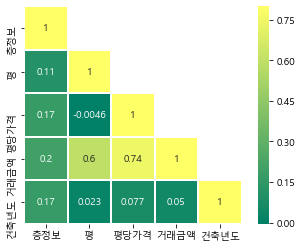

In [24]:
corr1 = df1[['층정보','평','평당가격','거래금액','건축년도']]
corr1 = corr1.corr()
print(corr1)

mask = np.array(corr1)
mask[np.tril_indices_from(mask)] = False 
sns.heatmap(corr1,
            mask=mask,
            vmax=0.8,
            square=True,
            annot=True,
           linewidths=0.8,
            cmap='summer'
           )

In [25]:
df2 = df1.pivot_table(index="시군구명").reset_index()
df2

,시군구명,거래금액,건물면적,건축년도,층정보,평,평당가격
0,강남구,1658443033,87,1998,9,26,63532698
1,강동구,826738228,74,2003,10,22,38041342
2,강북구,549965819,75,2004,9,23,24945671
3,강서구,671826467,73,2001,8,22,31534820
4,관악구,622692945,74,2002,9,23,28652480
5,광진구,1056556167,85,1999,11,26,41748508
6,구로구,541003859,71,1999,9,22,25158397
7,금천구,466106246,67,2004,10,20,23947064
8,노원구,515828011,64,1994,8,19,27369097
9,도봉구,455393115,70,1995,8,21,22052793


In [26]:
df2.corr()

,거래금액,건물면적,건축년도,층정보,평,평당가격
거래금액,1,1,-0,0,1,1
건물면적,1,1,0,0,1,1
건축년도,-0,0,1,0,0,-0
층정보,0,0,0,1,0,0
평,1,1,0,0,1,1
평당가격,1,1,-0,0,1,1


      층정보  평  평당가격  거래금액  건축년도
층정보     1  0     0     0     0
평       0  1    -0     1     0
평당가격    0 -0     1     1     0
거래금액    0  1     1     1     0
건축년도    0  0     0     0     1


<AxesSubplot:>

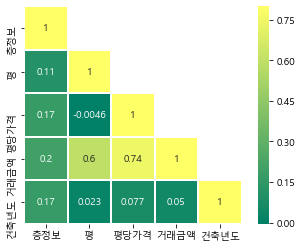

In [27]:
corr1 = df1[['층정보','평','평당가격','거래금액','건축년도']]
corr1 = corr1.corr()
print(corr1)

mask = np.array(corr1)
mask[np.tril_indices_from(mask)] = False 
sns.heatmap(corr1,
            mask=mask,
            vmax=0.8,
            square=True,
            annot=True,
           linewidths=0.8,
            cmap='summer'
           )

# 2. 아파트 브랜드별 지역위치와 평당가격의 상관관계

### 가설
- 브랜드 선호도가 높을수록 평당 가격이 높을 것이다.
- 평당 가격이 높은 지역일수록 선호도가 높은 아파트가 위치했을 것이다.
- 브랜드 선호도가 높은 아파트는 지역에 상관없이 가격이 높을 것이다.
- 소비자들의 아파트 브랜드 선호도에 영향을 끼치는 요인 중 지역과 가격이 큰 부분을 차지할 것이다.

In [28]:
df1

,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명,시군구명,읍면동명,평,평당가격,지역코드
0,60,5,아파트,749000000,2000,래미안 장위포레카운티,성북구,장위동,18,41611111,11290
1,117,2,아파트,1270000000,2000,래미안장위퍼스트하이,성북구,장위동,35,36285714,11290
2,60,17,아파트,820000000,2000,래미안장위퍼스트하이,성북구,장위동,18,45555556,11290
4,84,12,아파트,1150000000,2000,꿈의숲 아이파크,성북구,장위동,26,44230769,11290
5,84,18,아파트,1300000000,2000,꿈의숲 아이파크,성북구,장위동,26,50000000,11290
...,...,...,...,...,...,...,...,...,...,...,...
179762,85,7,아파트,1680000000,2016,래미안 웰스트림,마포구,현석동,26,64615385,11440
179763,85,30,아파트,1845000000,2016,래미안 웰스트림,마포구,현석동,26,70961538,11440
179764,85,17,아파트,1845000000,2016,래미안 웰스트림,마포구,현석동,26,70961538,11440
179766,59,3,아파트,930000000,1999,밤섬힐스테이트,마포구,현석동,18,51666667,11440


## 1) 아파트별 평당 가격 

In [29]:
df_apt=df1[['아파트명','평당가격','시군구명']]
df_apt

,아파트명,평당가격,시군구명
0,래미안 장위포레카운티,41611111,성북구
1,래미안장위퍼스트하이,36285714,성북구
2,래미안장위퍼스트하이,45555556,성북구
4,꿈의숲 아이파크,44230769,성북구
5,꿈의숲 아이파크,50000000,성북구
...,...,...,...
179762,래미안 웰스트림,64615385,마포구
179763,래미안 웰스트림,70961538,마포구
179764,래미안 웰스트림,70961538,마포구
179766,밤섬힐스테이트,51666667,마포구


## 2) 선호도 10위 내 서울에 위치한 아파트 데이터 추출
#### (9순위에 있는 'Lynn'은 서울에 있지 않아서 제외)

![아파트 선호도](https://media.discordapp.net/attachments/839002790470746114/845183375609561129/unknown.png?width=693&height=669)

In [30]:
# 선호도 1~10위 아파트 데이터 추출

df1_h = df_apt[df_apt['아파트명'].str.contains('힐스테이트')]
df1_z = df_apt[df_apt['아파트명'].str.contains('자이')] 
df1_r = df_apt[df_apt['아파트명'].str.contains('래미안')] 
df1_p = df_apt[df_apt['아파트명'].str.contains('푸르지오')] 
df1_l = df_apt[df_apt['아파트명'].str.contains('롯데캐슬')]

df1_e = df_apt[df_apt['아파트명'].str.contains('이편한')]
df1_e2 = df_apt[df_apt['아파트명'].str.contains('e-편한')]
df1_e = pd.concat([df1_e,df1_e2], ignore_index=True)

df1_ip = df_apt[df_apt['아파트명'].str.contains('아이파크')]
df1_ip2 = df_apt[df_apt['아파트명'].str.contains('I-PARK')]
df1_ip = pd.concat([df1_ip,df1_ip2], ignore_index=True)

df1_sharp = df_apt[df_apt['아파트명'].str.contains('더#')]
df1_sharp2 = df_apt[df_apt['아파트명'].str.contains('더샵')]
df1_sharp = pd.concat([df1_sharp,df1_sharp2], ignore_index=True)

df1_w = df_apt[df_apt['아파트명'].str.contains('위브')]
df1_w2 = df_apt[df_apt['아파트명'].str.contains('We')]
df1_w = pd.concat([df1_w,df1_w2],ignore_index=True)

df1_h['브랜드명'] = '힐스테이트'
df1_z['브랜드명']='자이'
df1_r['브랜드명']='래미안'
df1_p['브랜드명']= '푸르지오'
df1_l['브랜드명']= '롯데캐슬'
df1_e['브랜드명'] = '이편한'
df1_ip['브랜드명'] = '아이파크'
df1_sharp['브랜드명']= '더샵'
df1_w['브랜드명']= '두산위브'

# 추출한 데이터 합치기
df_brand_list= pd.concat([df1_h,df1_z,df1_r,df1_p,df1_l,df1_e,df1_ip,df1_sharp,df1_w], ignore_index=True)
df_brand_list


<ipython-input-30-d1450a094033>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_h['브랜드명'] = '힐스테이트'
<ipython-input-30-d1450a094033>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_z['브랜드명']='자이'
<ipython-input-30-d1450a094033>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,아파트명,평당가격,시군구명,브랜드명
0,힐스테이트,47441860,성동구,힐스테이트
1,힐스테이트,57800000,성동구,힐스테이트
2,힐스테이트,48837209,성동구,힐스테이트
3,힐스테이트,36279070,성동구,힐스테이트
4,힐스테이트,76923077,성동구,힐스테이트
...,...,...,...,...
16885,광진We’vePark,23095238,광진구,두산위브
16886,광진We’vePark,22500000,광진구,두산위브
16887,광진We’vePark,23750000,광진구,두산위브
16888,광진We’vePark,25121951,광진구,두산위브


## 3) 아파트 브랜드 별 평균 평당가격 순위

In [31]:
df_brand=df_brand_list.groupby(['브랜드명'])[['평당가격']].mean().reset_index()
brand_rank=df_brand.sort_values(by=['평당가격'], ascending=False)
brand_rank

,브랜드명,평당가격
6,자이,54135238
2,래미안,49430642
8,힐스테이트,44754887
0,더샵,44024946
4,아이파크,43939031
3,롯데캐슬,42588220
7,푸르지오,41354364
5,이편한,41205778
1,두산위브,36929744


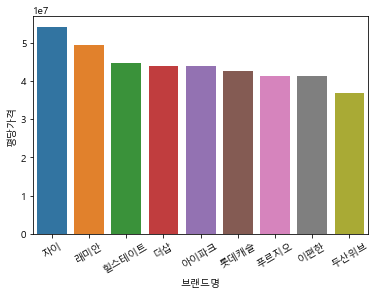

<Figure size 3600x1440 with 0 Axes>

In [32]:
#brand_rank.plot(kind='bar', x='브랜드명')
plt.xticks(rotation=30)

sns.barplot(x="브랜드명", y="평당가격", data=brand_rank)
plt.figure(figsize=(50, 20))
plt.rc('font', size=10)
plt.show()

### 데이터 분석 : 
기사에서는 선호도가 1위 힐스테이, 2위 자이, 3위 래미안였으나 평균 평당 가격을 확인해보니 1. 자이, 2. 래미안, 3. 힐스테이트였다.
선호도 1위였던 힐스테이트보다 선호도 3위인 자이가 평당가격이 천만원 가량 차이나는 걸로 보아 브랜드 선호도가 아파트의 평당 가격에 절대적인 영향을 미치지는 않는다고 판단된다. 혹시 다른 요소가 영향을 미치지는 않는지 다른 데이터 확인할 필요성이 느껴진다.
---

## 4) 지역별 분위 나누기 (평당가격 기준)

#### 1분위: 강남구,서초구,송파구,용산구,성동구 
#### 2분위: 마포구, 광진구, 동작구, 영등포구, 강동구, 중구, 양천구 
#### 3분위: 서대문구,종로구,동대문구,강서구,성북구, 관악구 
#### 4분위: 은평구, 노원구, 구로구,강북구, 중랑구, 금천구, 도봉구

In [33]:
# 4분위 나누기 위한 리스트 생성

one = ['강남구','서초구','송파구','용산구','성동구'] 
two = ['마포구', '광진구', '동작구', '영등포구', '강동구', '중구', '양천구'] 
three = ['서대문구','종로구','동대문구','강서구','성북구', '관악구'] 
four = ['은평구', '노원구', '구로구','강북구', '중랑구', '금천구', '도봉구'] 

In [34]:
# 시군구명 4분위 나눠서 값 입력 함수 선언

def area():     
    for i in df_brand_list['시군구명']:         
        if i in one:              
            df_brand_list.loc[df_brand_list['시군구명'] == i,'시군구명분위']= 1     
        elif i in two:
            df_brand_list.loc[df_brand_list['시군구명'] == i,'시군구명분위']= 2
        elif i in three:
            df_brand_list.loc[df_brand_list['시군구명'] == i,'시군구명분위']= 3   
        elif i in four:
            df_brand_list.loc[df_brand_list['시군구명'] == i,'시군구명분위']= 4  
        else:    
            df_brand_list.loc[df_brand_list['시군구명'].isnull(),'시군구명분위']= np.nan
        
    return df_brand_list  

area()



,아파트명,평당가격,시군구명,브랜드명,시군구명분위
0,힐스테이트,47441860,성동구,힐스테이트,1
1,힐스테이트,57800000,성동구,힐스테이트,1
2,힐스테이트,48837209,성동구,힐스테이트,1
3,힐스테이트,36279070,성동구,힐스테이트,1
4,힐스테이트,76923077,성동구,힐스테이트,1
...,...,...,...,...,...
16885,광진We’vePark,23095238,광진구,두산위브,2
16886,광진We’vePark,22500000,광진구,두산위브,2
16887,광진We’vePark,23750000,광진구,두산위브,2
16888,광진We’vePark,25121951,광진구,두산위브,2


## 5) 아파트 브랜드별 가격과 지역별 분포

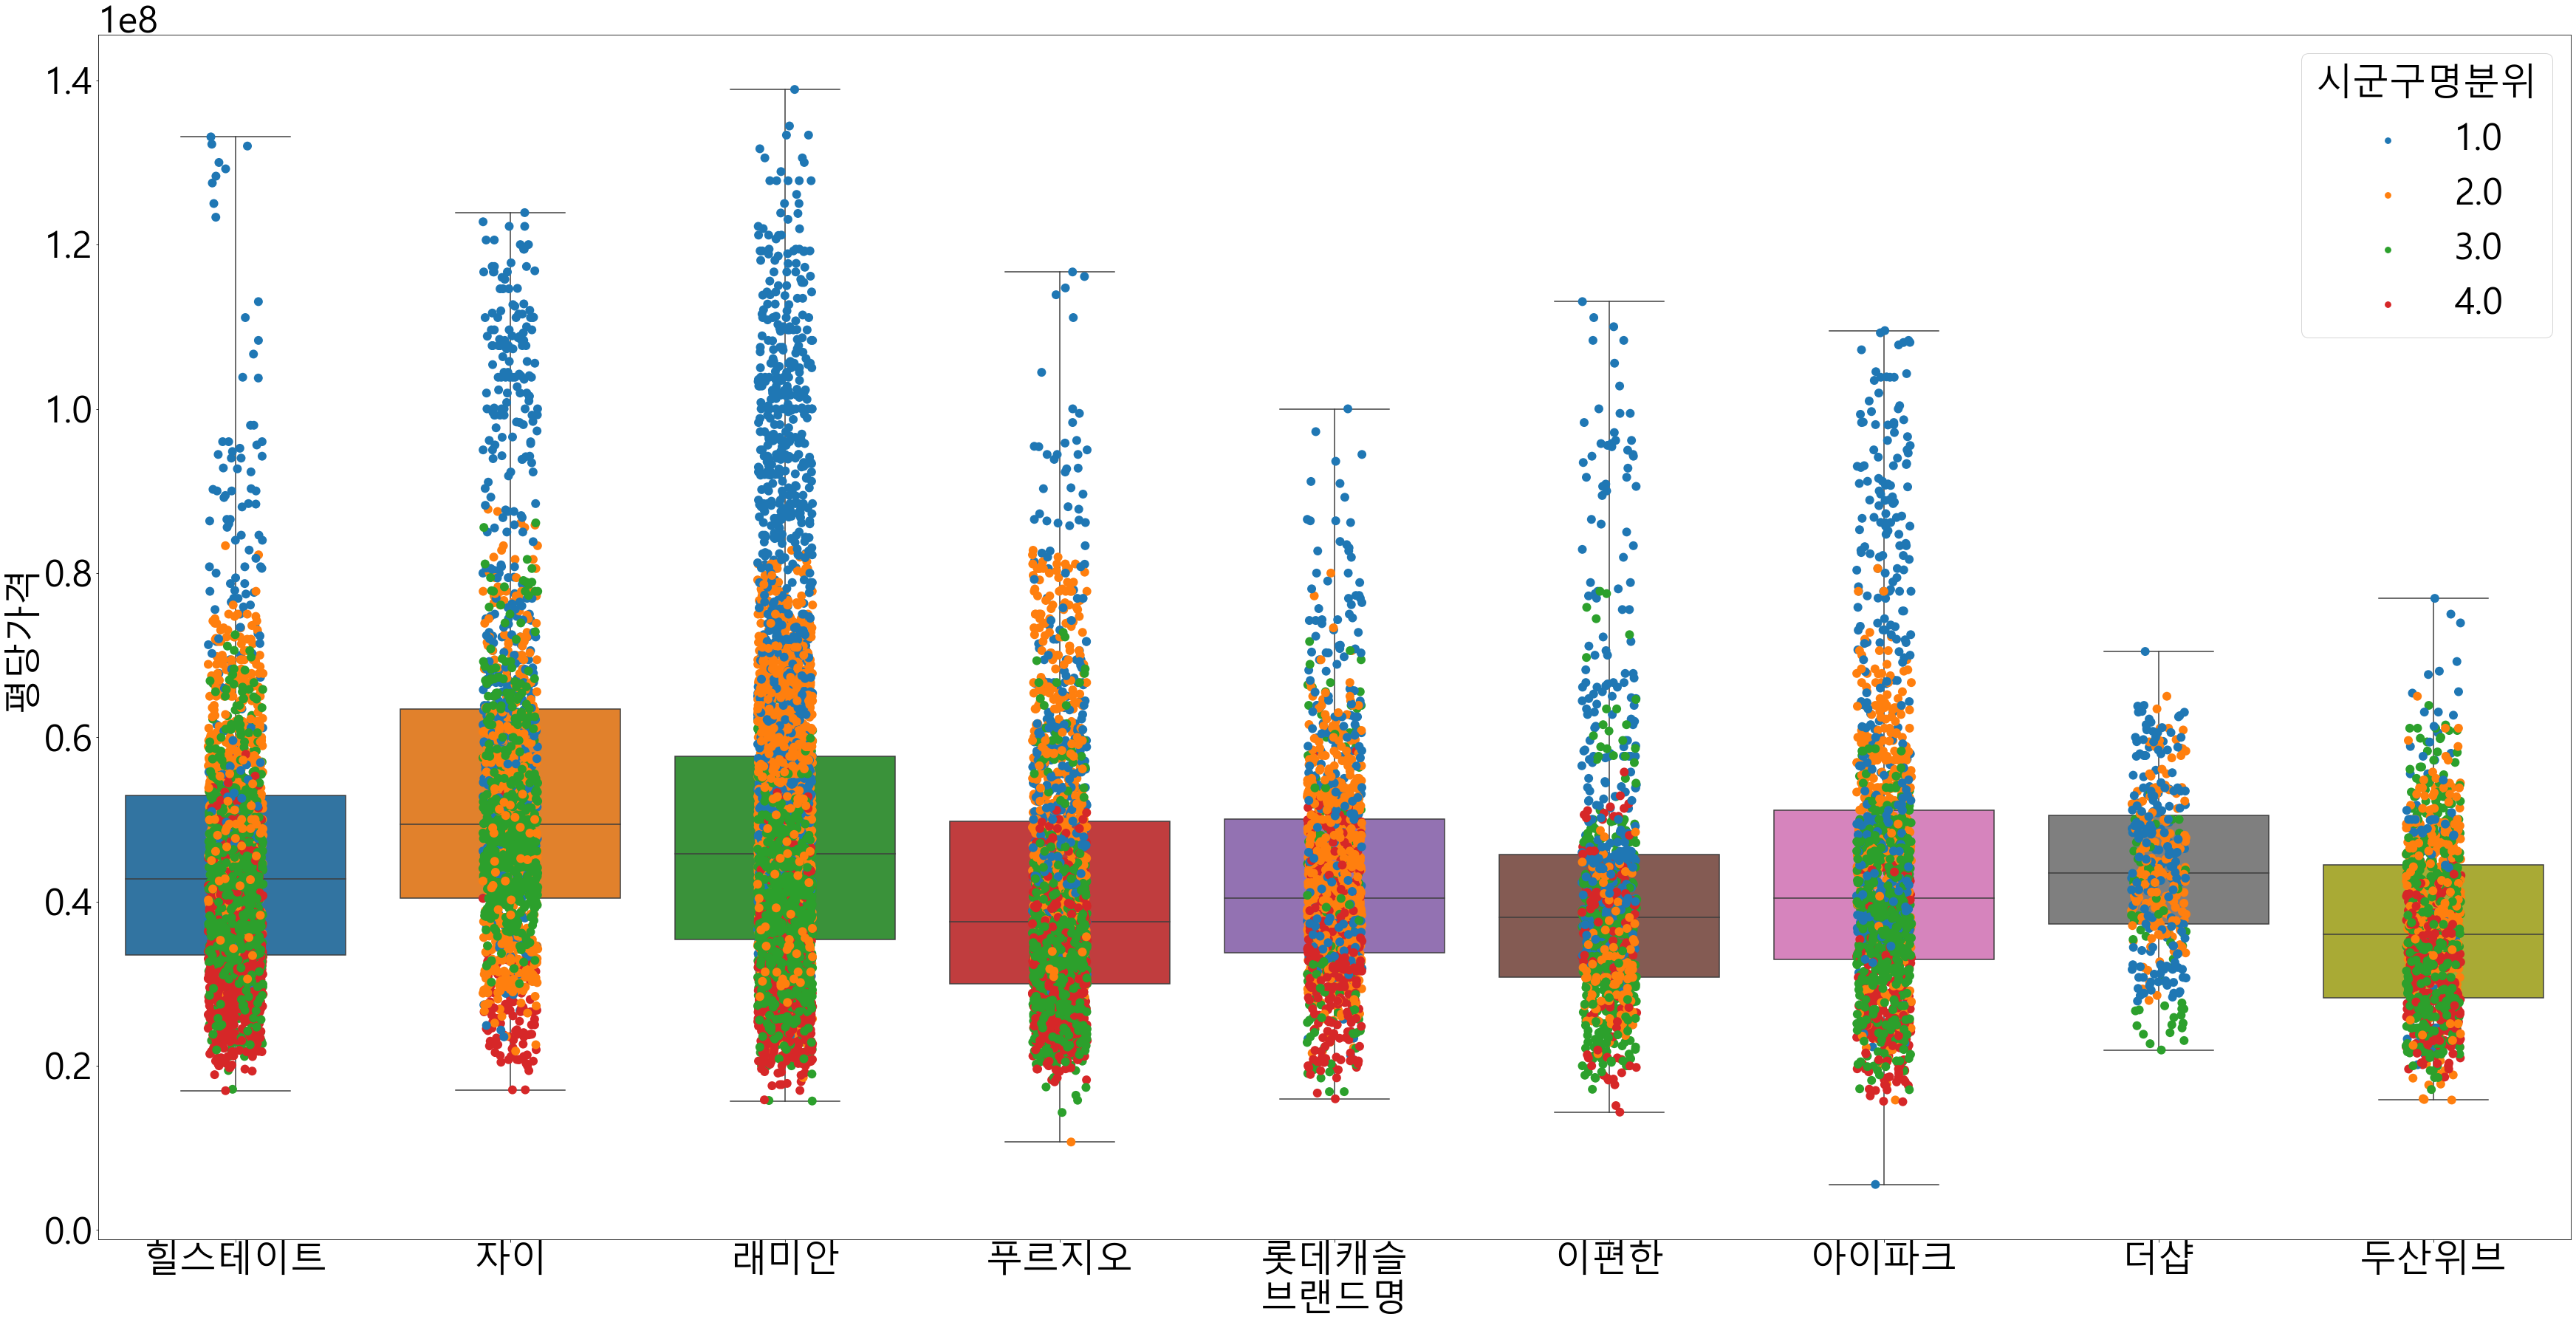

In [37]:
#plt.title("Boxplot과 Strip Plot로 표현한, 브랜드 아파트 별 평당가격 정보")

plt.figure(figsize=(60,30))
plt.rc('font', size=50)
sns.boxplot(x="브랜드명", y="평당가격", data=df_brand_list, whis=np.inf)
sns.stripplot(x="브랜드명", y="평당가격", data=df_brand_list, jitter=True, hue='시군구명분위', size=12)
plt.xticks(rotation=0)
plt.show()

#### - 서울에 위치한 아파트 브랜드 중에 래미안의 수가 가장 많다.
#### - 선호도가 높은 힐스테이트의 경우 평당 가격 순위는 3위로 자이와 래미안 보다 선호도가 높다.  하지만  1분위 지역의 분포가 적기 때문에 평당 가격 순위가 선호도 순위보다 낮게 나온 것으로 보인다.
#### - 아파트 브랜드와 입지는 뗄래야 뗄 수 없는 관계이다. 

[[보이는 부동산] 아파트 브랜드 선호도…왜 차이가 날까](https://www.etoday.co.kr/news/view/1797781)

기사 내용 中

◇왜 특정 브랜드 가치는 계속 높아질까

사실 아파트의 가치를 가장 크게 결정짓는 요소는 '브랜드'보다는 '입지'라는 게 정설입니다. ‘땅 위에 짓는 건물’이라는 특성상, 지가(地價)가 낮은 지방 소도시에 지은 대형 건설사의 브랜드 아파트가 강남 노른자 땅 위에 건설된 소형 건설사의 아파트보다 비쌀 수 없기 때문입니다.

브랜드 가치는 무엇 때문에 갈리는 걸까요?
#### 정답은 ‘고급 브랜드’만이 땅값이 높은 ‘고급 입지’를 선택할 수 있기 때문입니다. 교통이 편리하고 우수한 학군과 이용이 간편한 상업시설을 갖춘 땅값 높은 지역에는 신축 아파트와 더불어 아파트나 주택이 오래된 재개발‧재건축 사업지가 있게 마련입니다.
- 선호도 순위와 가격순위가 높은 힐스테이트와 자이, 래미안은 3,4분위에 위치해 있는 수가 적지 않음에도 불구하고 땅 값이 높은 고급 입지에 위치한 아파트 수가 많아 그 영향이 크게 미친것으로 보인다.
- 힐스테이트와 자이, 래미안은 다른 아파트에 비해서 최대 가격이 매우 높다는 것이 영향을 끼쳤을 것으로 분석된다.
